In [ ]:
pip install opencv-python torch torchvision


In [ ]:
import cv2
import torch

# Load the YOLOv5 model (YOLOv5s is a smaller, faster model. You can try different versions)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # Or use 'yolov5l', 'yolov5m' for larger models

# Define thresholds for density classification
LOW_DENSITY_THRESHOLD = 5
MEDIUM_DENSITY_THRESHOLD = 10

def classify_density(car_count):
    """Classify traffic density based on car count."""
    if car_count <= LOW_DENSITY_THRESHOLD:
        return "Low Density"
    elif LOW_DENSITY_THRESHOLD < car_count <= MEDIUM_DENSITY_THRESHOLD:
        return "Medium Density"
    else:
        return "High Density"

def detect_vehicles(image_path):
    """Detect vehicles in the image and classify density."""
    # Read the image
    img = cv2.imread(image_path)

    # Perform object detection using YOLO
    results = model(img)

    # Filter results to only detect cars, buses, and trucks (classes 2, 5, 7 for COCO dataset)
    detected_objects = results.pandas().xyxy[0]
    car_count = len(detected_objects[(detected_objects['class'] == 2) |  # Car
                                     (detected_objects['class'] == 5) |  # Bus
                                     (detected_objects['class'] == 7)])  # Truck

    # Classify density based on the car count
    density = classify_density(car_count)

    # Show the detection results
    results.show()

    return density, car_count

# Example usage
image_path = '/content/test.jpg'
density, car_count = detect_vehicles(image_path)
print(f"Vehicle Count: {car_count}")
print(f"Traffic Density: {density}")


/usr/local/lib/python3.10/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2024-12-4 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

100%|██████████| 14.1M/14.1M [00:00<00:00, 119MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.5/898.5 kB 19.6 MB/s eta 0:00:00


In [ ]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load YOLOv8 model
model = YOLO('yolov8s.pt')  # Using yolov8s pre-trained model

# Define thresholds for density classification
LOW_DENSITY_THRESHOLD = 5
MEDIUM_DENSITY_THRESHOLD = 10

def classify_density(car_count):
    """Classify traffic density based on car count."""
    if car_count <= LOW_DENSITY_THRESHOLD:
        return "Low Density"
    elif LOW_DENSITY_THRESHOLD < car_count <= MEDIUM_DENSITY_THRESHOLD:
        return "Medium Density"
    else:
        return "High Density"

def process_image(image_path):
    """Process a single image, detect vehicles, and classify density."""
    # Load the image
    img = cv2.imread(image_path)

    # Perform object detection
    results = model(img)

    # Filter the detections for cars, buses, and trucks
    detected_objects = results[0].boxes.cls
    car_count = sum([1 for cls in detected_objects if cls in [2, 5, 7]])  # 2: car, 5: bus, 7: truck

    # Classify traffic density
    density = classify_density(car_count)

    # Display the image with bounding boxes
    result_img = results[0].plot()

    # Convert the result for plotting with Matplotlib (BGR to RGB)
    result_img_rgb = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)

    # Display the image with density information
    plt.imshow(result_img_rgb)
    plt.title(f"Traffic Density: {density} (Vehicle Count: {car_count})")
    plt.axis('off')  # Hide axes for a cleaner look
    plt.show()

    # Print density information to the console
    print(f"Image: {image_path}")
    print(f"Vehicle Count: {car_count}")
    print(f"Traffic Density: {density}")

# List of image file paths
image_paths = ['/content/WhatsApp Image 2024-11-15 at 8.39.24 AM.jpeg', '/content/WhatsApp Image 2024-11-15 at 8.39.25 AM.jpeg', '/content/WhatsApp Image 2024-11-15 at 8.39.27 AM.jpeg']  # Add your image paths

# Process each image in the list
for image_path in image_paths:
    process_image(image_path)


In [ ]:
!pip install ultralytics opencv-python-headless matplotlib


In [ ]:
pip install opencv-python numpy

In [ ]:
pip install opencv-contrib-python


In [ ]:
import cv2
print("cv2.bgsegm is available:", hasattr(cv2, "bgsegm"))


cv2.bgsegm is available: True


In [ ]:
import cv2
import numpy as np
from time import sleep

largura_min=80 #Largura minima do retangulo
altura_min=80 #Altura minima do retangulo

offset=6 #Erro permitido entre pixel

pos_linha=550 #Posição da linha de contagem

delay= 60 #FPS do vídeo

detec = []
carros= 0


def pega_centro(x, y, w, h):
    x1 = int(w / 2)
    y1 = int(h / 2)
    cx = x + x1
    cy = y + y1
    return cx,cy

cap = cv2.VideoCapture('/content/WhatsApp Video 2024-11-19 at 8.59.41 PM.mp4')
subtracao = cv2.bgsegm.createBackgroundSubtractorMOG()

while True:
    ret , frame1 = cap.read()
    tempo = float(1/delay)
    sleep(tempo)
    grey = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(grey,(3,3),5)
    img_sub = subtracao.apply(blur)
    dilat = cv2.dilate(img_sub,np.ones((5,5)))
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    dilatada = cv2.morphologyEx (dilat, cv2. MORPH_CLOSE , kernel)
    dilatada = cv2.morphologyEx (dilatada, cv2. MORPH_CLOSE , kernel)
    contorno,h=cv2.findContours(dilatada,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

    cv2.line(frame1, (25, pos_linha), (1200, pos_linha), (255,127,0), 3)
    for(i,c) in enumerate(contorno):
        (x,y,w,h) = cv2.boundingRect(c)
        validar_contorno = (w >= largura_min) and (h >= altura_min)
        if not validar_contorno:
            continue

        cv2.rectangle(frame1,(x,y),(x+w,y+h),(0,255,0),2)
        centro = pega_centro(x, y, w, h)
        detec.append(centro)
        cv2.circle(frame1, centro, 4, (0, 0,255), -1)

        for (x,y) in detec:
            if y<(pos_linha+offset) and y>(pos_linha-offset):
                carros+=1
                cv2.line(frame1, (25, pos_linha), (1200, pos_linha), (0,127,255), 3)
                detec.remove((x,y))
                print("car is detected : "+str(carros))

    cv2.putText(frame1, "VEHICLE COUNT : "+str(carros), (450, 70), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255),5)
    cv2.imshow("Video Original" , frame1)
    cv2.imshow("Detectar",dilatada)

    if cv2.waitKey(1) == 27:
        break

cv2.destroyAllWindows()
cap.release()

AttributeError: module 'cv2.bgsegm' has no attribute 'createBackgroundSubtractorMOG'

In [ ]:
import cv2
import numpy as np
from time import sleep

largura_min = 80  # Minimum width of the rectangle
altura_min = 80  # Minimum height of the rectangle

offset = 6  # Allowed error in pixels

pos_linha = 550  # Position of the counting line

delay = 60  # FPS of the video

detec = []
carros = 0


def pega_centro(x, y, w, h):
    x1 = int(w / 2)
    y1 = int(h / 2)
    cx = x + x1
    cy = y + y1
    return cx, cy


# Replace with the correct path to your video file
cap = cv2.VideoCapture('/content/WhatsApp Video 2024-11-19 at 8.59.41 PM.mp4')
subtracao = cv2.createBackgroundSubtractorMOG2()  # Updated function

while True:
    ret, frame1 = cap.read()
    if not ret:
        print("End of video or cannot fetch frame")
        break

    tempo = float(1 / delay)
    sleep(tempo)
    grey = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(grey, (3, 3), 5)
    img_sub = subtracao.apply(blur)
    dilat = cv2.dilate(img_sub, np.ones((5, 5), np.uint8))
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    dilatada = cv2.morphologyEx(dilat, cv2.MORPH_CLOSE, kernel)
    dilatada = cv2.morphologyEx(dilatada, cv2.MORPH_CLOSE, kernel)
    contorno, h = cv2.findContours(dilatada, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    cv2.line(frame1, (25, pos_linha), (1200, pos_linha), (255, 127, 0), 3)
    for (i, c) in enumerate(contorno):
        (x, y, w, h) = cv2.boundingRect(c)
        validar_contorno = (w >= largura_min) and (h >= altura_min)
        if not validar_contorno:
            continue

        cv2.rectangle(frame1, (x, y), (x + w, y + h), (0, 255, 0), 2)
        centro = pega_centro(x, y, w, h)
        detec.append(centro)
        cv2.circle(frame1, centro, 4, (0, 0, 255), -1)

        for (x, y) in detec:
            if y < (pos_linha + offset) and y > (pos_linha - offset):
                carros += 1
                cv2.line(frame1, (25, pos_linha), (1200, pos_linha), (0, 127, 255), 3)
                detec.remove((x, y))
                print("Car is detected: " + str(carros))

    cv2.putText(frame1, "VEHICLE COUNT: " + str(carros), (450, 70), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 5)
    cv2.imshow("Video Original", frame1)
    cv2.imshow("Detection", dilatada)

    if cv2.waitKey(1) == 27:  # Press 'Esc' to exit
        break

cv2.destroyAllWindows()
cap.release()


End of video or cannot fetch frame



0: 608x640 1 bus, 2 trucks, 10.9ms
Speed: 2.8ms preprocess, 10.9ms inference, 1.3ms postprocess per image at shape (1, 3, 608, 640)
Detected objects:
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([7., 7., 5.], device='cuda:0')
conf: tensor([0.4188, 0.3601, 0.3233], device='cuda:0')
data: tensor([[1.6729e+02, 1.1877e+02, 2.1890e+02, 1.7332e+02, 4.1875e-01, 7.0000e+00],
        [2.7992e+02, 1.3193e+02, 3.5653e+02, 2.0173e+02, 3.6011e-01, 7.0000e+00],
        [2.5079e+02, 1.3161e+02, 2.8348e+02, 1.6741e+02, 3.2334e-01, 5.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (411, 437)
shape: torch.Size([3, 6])
xywh: tensor([[193.0952, 146.0452,  51.6040,  54.5526],
        [318.2221, 166.8302,  76.6059,  69.7938],
        [267.1349, 149.5116,  32.6988,  35.8028]], device='cuda:0')
xywhn: tensor([[0.4419, 0.3553, 0.1181, 0.1327],
        [0.7282, 0.4059, 0.1753, 0.1698],
        [0.6113, 0.3638, 0.0748, 0.0871]], device='cuda:0')
xyxy: tensor([[167.2932

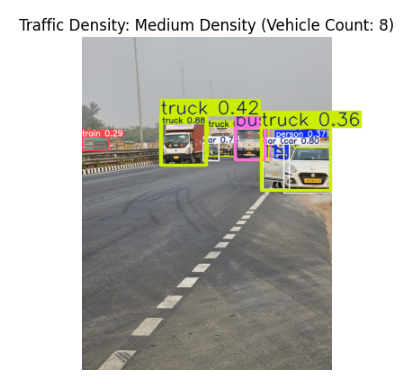

Annotated image saved at path/to/save/annotated_image.jpg


In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the YOLOv8 model
model = YOLO('yolov8n.pt')

# Path to the input image
image_path = '/content/Test image 1.png'

# Load the image
image = cv2.imread(image_path)
if image is None:
    raise ValueError(f"Failed to load image at {image_path}")

# Perform object detection
results = model(image)

# Access detection results
result = results[0]  # Access the first result
print("Detected objects:")
print(result.boxes)  # Print bounding boxes and related information

# Annotate the image with detection results
annotated_image = result.plot()

# Display the annotated image
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Save the annotated image
output_path = 'path/to/save/annotated_image.jpg'
cv2.imwrite(output_path, annotated_image)
print(f"Annotated image saved at {output_path}")



0: 480x640 4 persons, 2 cars, 1 motorcycle, 8 trucks, 9.3ms
Speed: 2.4ms preprocess, 9.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
Detected objects in /content/WhatsApp Image 2024-11-15 at 8.39.24 AM.jpeg:
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([7., 7., 2., 7., 7., 0., 0., 0., 7., 7., 7., 3., 2., 0., 7.], device='cuda:0')
conf: tensor([0.8887, 0.7951, 0.7870, 0.7416, 0.6257, 0.4867, 0.4371, 0.3615, 0.3544, 0.3508, 0.3437, 0.2922, 0.2866, 0.2698, 0.2508], device='cuda:0')
data: tensor([[1.5248e+02, 3.0267e+02, 4.2699e+02, 5.4010e+02, 8.8873e-01, 7.0000e+00],
        [0.0000e+00, 4.0724e+00, 1.8983e+02, 6.8867e+02, 7.9505e-01, 7.0000e+00],
        [7.6230e+02, 4.3387e+02, 9.9041e+02, 6.3453e+02, 7.8697e-01, 2.0000e+00],
        [1.1523e+03, 3.4144e+02, 1.2428e+03, 4.6915e+02, 7.4164e-01, 7.0000e+00],
        [4.2203e+02, 4.1866e+02, 5.5508e+02, 5.5731e+02, 6.2570e-01, 7.0000e+00],
        [1.0552e+03, 4.2789e+02, 1.0738e+03, 4.8438

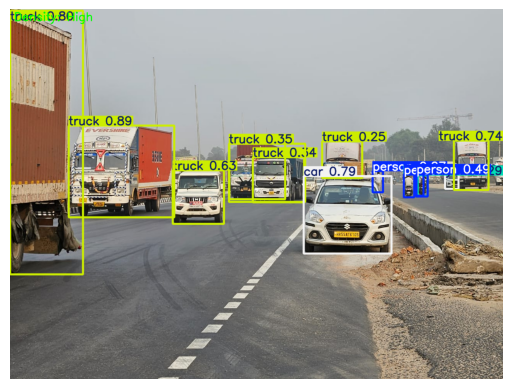

Annotated image saved at /content/annotated_images/annotated_WhatsApp Image 2024-11-15 at 8.39.24 AM.jpeg

0: 640x480 4 cars, 4 trucks, 9.7ms
Speed: 2.5ms preprocess, 9.7ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 480)
Detected objects in /content/WhatsApp Image 2024-11-15 at 8.39.25 AM.jpeg:
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([2., 2., 2., 7., 7., 2., 7., 7.], device='cuda:0')
conf: tensor([0.9037, 0.7828, 0.7827, 0.7068, 0.7000, 0.6262, 0.4911, 0.3798], device='cuda:0')
data: tensor([[2.7158e+00, 3.0115e+02, 2.7591e+02, 4.7261e+02, 9.0371e-01, 2.0000e+00],
        [7.1340e+02, 2.9315e+02, 7.7487e+02, 3.4566e+02, 7.8284e-01, 2.0000e+00],
        [7.6627e+02, 2.8146e+02, 8.9826e+02, 3.9150e+02, 7.8273e-01, 2.0000e+00],
        [4.8495e+02, 2.2264e+02, 6.5651e+02, 3.9396e+02, 7.0679e-01, 7.0000e+00],
        [2.4332e+02, 2.6742e+02, 3.8338e+02, 4.0851e+02, 6.9995e-01, 7.0000e+00],
        [3.4609e+02, 2.7860e+02, 6.1132e+02, 4.7707e+0

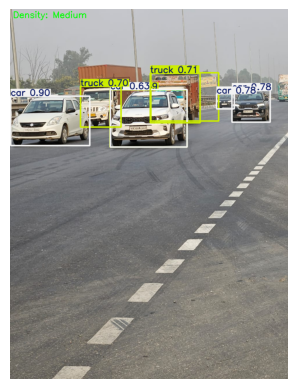

Annotated image saved at /content/annotated_images/annotated_WhatsApp Image 2024-11-15 at 8.39.25 AM.jpeg

0: 640x480 3 cars, 2 buss, 5 trucks, 14.6ms
Speed: 2.7ms preprocess, 14.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)
Detected objects in /content/WhatsApp Image 2024-11-15 at 8.39.26 AM.jpeg:
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([7., 2., 2., 5., 2., 5., 7., 7., 7., 7.], device='cuda:0')
conf: tensor([0.8848, 0.8382, 0.8353, 0.7598, 0.7211, 0.5647, 0.5270, 0.3957, 0.2916, 0.2547], device='cuda:0')
data: tensor([[2.5504e-01, 2.6595e+02, 2.8179e+02, 5.5993e+02, 8.8483e-01, 7.0000e+00],
        [6.8398e+02, 4.2153e+02, 9.1391e+02, 6.1447e+02, 8.3824e-01, 2.0000e+00],
        [5.7300e+02, 4.2117e+02, 6.3832e+02, 4.8606e+02, 8.3535e-01, 2.0000e+00],
        [6.0380e+02, 3.7620e+02, 6.8194e+02, 4.5885e+02, 7.5981e-01, 5.0000e+00],
        [5.0435e+02, 4.2835e+02, 5.8034e+02, 4.9319e+02, 7.2111e-01, 2.0000e+00],
        [4.1977e+02,

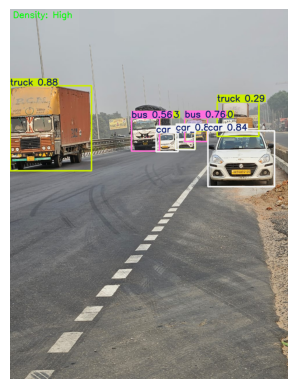

Annotated image saved at /content/annotated_images/annotated_WhatsApp Image 2024-11-15 at 8.39.26 AM.jpeg


In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os

# Load the YOLOv8 model
model = YOLO('yolov8n.pt')

# List of image paths (add your own image paths)
image_paths = [
    '/content/WhatsApp Image 2024-11-15 at 8.39.24 AM.jpeg',
    '/content/WhatsApp Image 2024-11-15 at 8.39.25 AM.jpeg',
    '/content/WhatsApp Image 2024-11-15 at 8.39.26 AM.jpeg'
]

# Output directory to save annotated images
output_dir = '/content/annotated_images/'
os.makedirs(output_dir, exist_ok=True)

# Vehicle density classification thresholds (adjust as needed)
density_thresholds = {
    'low': 5,   # Less than 10 vehicles
    'medium': 10, # Between 10 and 30 vehicles
    'high': 15   # More than 30 vehicles
}

def classify_density(vehicle_count):
    if vehicle_count < density_thresholds['low']:
        return 'Low'
    elif vehicle_count < density_thresholds['medium']:
        return 'Medium'
    else:
        return 'High'

for image_path in image_paths:
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Failed to load image at {image_path}")
        continue

    # Perform object detection
    results = model(image)

    # Access the first result (assuming there's only one result per image)
    result = results[0]  # Access the first result

    # Get the number of detected vehicles (boxes)
    vehicle_count = len(result.boxes)

    # Classify vehicle density
    density = classify_density(vehicle_count)

    # Print the detected objects' bounding boxes and vehicle density
    print(f"Detected objects in {image_path}:")
    print(result.boxes)  # Print bounding boxes and related information
    print(f"Vehicle Density: {density} ({vehicle_count} vehicles)")

    # Annotate the image with detection results
    annotated_image = result.plot()

    # Add density label to the image
    cv2.putText(annotated_image, f"Density: {density}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Display the annotated image
    plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Save the annotated image
    output_path = os.path.join(output_dir, f"annotated_{os.path.basename(image_path)}")
    cv2.imwrite(output_path, annotated_image)
    print(f"Annotated image saved at {output_path}")
